# Lead scoring case Study

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 


The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.


As we can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

Our target is to analysis and make a logistic regression model to predict who will be converted at the end using previous data.

#### Steps for logistic regression model

- Collecting and reading data.

- Data treatment.

>dealing with missing values. 

- univariate and multivariate analysis.

- Data preperation.

- Model Building.

> featuring using RFE

> checking the metrices.

> plotting the ROC curve

> Finding the optimal value

> Precision and Recall

In [850]:
# importing the libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [851]:
# reading the given data
df= pd.read_csv('C:\\Users\\pawan\\Desktop\\lead scoring case study\\Lead+Scoring+Case+Study\\Lead Scoring Assignment\\leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [852]:
# getting the adequate information on the data like shape and info.
df.shape

(9240, 37)

In [853]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

As we can see there are missing values in the given data

In [854]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [855]:
# calculating the missing percentage values.
round(((df.isnull().sum()/len(df))*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

##### We will be drooping the columns with high perceentage of missing values.

In [856]:
df=df.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score','Tags'],axis=1)

In [857]:
round((df.isnull().sum()/len(df))*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [858]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

##### Some of our columns have value 'select' which is in need to deal with.

In [859]:
# filling all the select value with nan.
df=df.replace(['Select','select'],np.nan)

In [860]:
round((df.isnull().sum()/len(df))*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

##### After the treatment we can see there are more missing values so, we will again dropping the columns with high missing values

In [861]:
df=df.drop(['Lead Profile','City','How did you hear about X Education'],axis=1)

In [862]:
round((df.isnull().sum()/len(df))*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [863]:
# dropping variables which are of no use in our model building
df=df.drop(['Prospect ID','Lead Number'],axis=1)

In [864]:
# Checking the number of unique values in all our data.
df.nunique(axis = 0)

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

##### As we see here some variables with only one value count. hence we will be dropping those columns(no use in model building as well as in EDA).

In [865]:
df=df.drop(['Magazine','Receive More Updates About Our Courses','Get updates on DM Content','Get updates on DM Content','I agree to pay the amount through cheque','Update me on Supply Chain Content'],axis=1)

In [866]:
# as these two variables are collinear we will be dropping one of these. Last Activity or Last Notable Activity
df=df.drop(['Last Notable Activity'], axis = 1)

In [867]:
df.nunique(axis = 0)

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [868]:
# Now we will be filling null values with one specific value.

In [869]:
df['Specialization'] = df['Specialization'].fillna('Not specified')
df['Country'] = df['Country'].fillna('Not specified')
df['What is your current occupation'] = df['What is your current occupation'].fillna('Not specified')
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('Not specified')



In [870]:
round((df.isnull().sum()/len(df))*100)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      1.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             1.0
Last Activity                                    1.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [871]:
# dropping rows with null values.
df=df.dropna()

In [872]:
round((df.isnull().sum()/len(df))*100)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

##### Now our data has no missing values.

In [873]:
df.shape

(9074, 20)

In [874]:
df['Country'].value_counts()

India                   6491
Not specified           2296
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Bangladesh                 2
Italy                      2
Ghana                      2
Uganda                     2
China                      2
Belgium                    2
Philippines                2
Netherlands                2
Asia/Pacific Region        2
Liberia                    1
Indonesia                  1
Russia                     1
Sri Lanka                  1
Tanzania                   1
Switzerland   

Here we can see high number of values in country col so we will be adding all other countries in a specific column.

In [875]:

def countries(x):

    col = ""

    if x == 'India':
        col  = "India"

    elif x == "Not specified":
        col = "Not specified"
    else: 
        col = "Rest of the World"
        
        
    return col

In [876]:
#Adding countries other than india in a column named 'Rest of the world'
df['Country'] = df.apply(lambda x: countries(x['Country']), axis = 1)

In [877]:
df['Country'].value_counts()

India                6491
Not specified        2296
Rest of the World     287
Name: Country, dtype: int64

In [878]:
# treating all the values with values 'Yes' or 'No' and converting them into binary values.
binary_list=['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
df[binary_list]=df[binary_list].apply(binary_map)    

In [879]:
df['Specialization'].value_counts()

Not specified                        3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [880]:
df=df.replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'],'Management')

In [881]:
df['Specialization'].value_counts()

Management                           4197
Not specified                        3282
Business Administration               399
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
E-COMMERCE                            111
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

## EDA

In this section we will be performing univariate and multivariate analysis.

In [882]:
# making a list of numerical columns.
num_col=list(df.describe().columns)
num_col

['Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [883]:
# making a list of categorical columns.
cat_col = list(set(df.columns)-set(num_col))
cat_col

['Lead Origin',
 'What matters most to you in choosing a course',
 'Specialization',
 'Last Activity',
 'What is your current occupation',
 'Country',
 'Lead Source']

### Univariate analysis

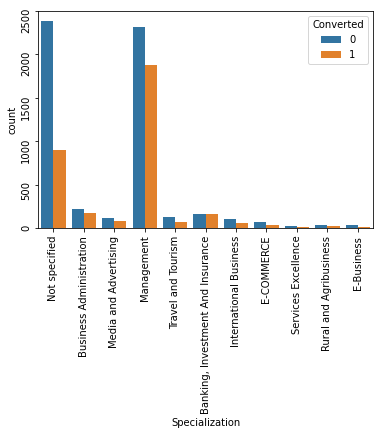

In [884]:
# graph of specialization vs target variable Converted.
sns.countplot(x='Specialization', hue='Converted', data= df).tick_params(rotation=90)

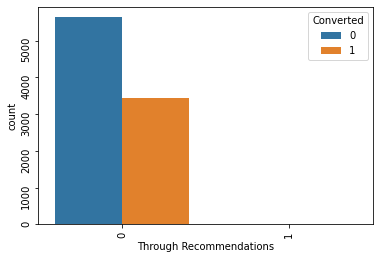

In [885]:
# graph of Through Recommendations vs target variable Converted.
sns.countplot(x='Through Recommendations', hue='Converted', data= df).tick_params(rotation=90)

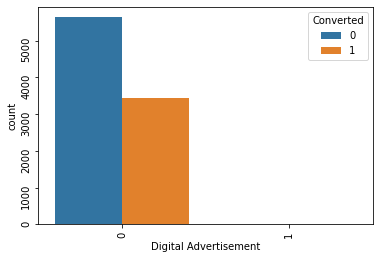

In [886]:
# graph of Digital Advertisement vs target variable Converted.
sns.countplot(x='Digital Advertisement', hue='Converted', data= df).tick_params(rotation=90)

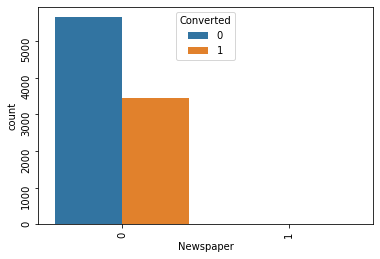

In [887]:
# graph of 'Newspaper' vs target variable Converted.
sns.countplot(x='Newspaper', hue='Converted', data= df).tick_params(rotation=90)

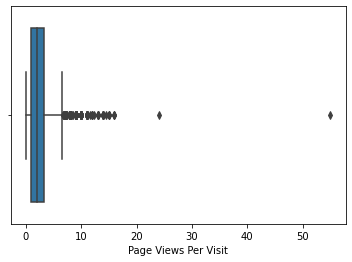

In [888]:
sns.boxplot(df['Page Views Per Visit'])

In [889]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.

In [890]:
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

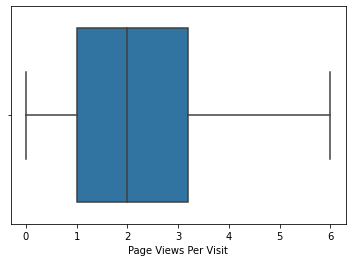

In [891]:
sns.boxplot(df['Page Views Per Visit'])

### Mulivariate

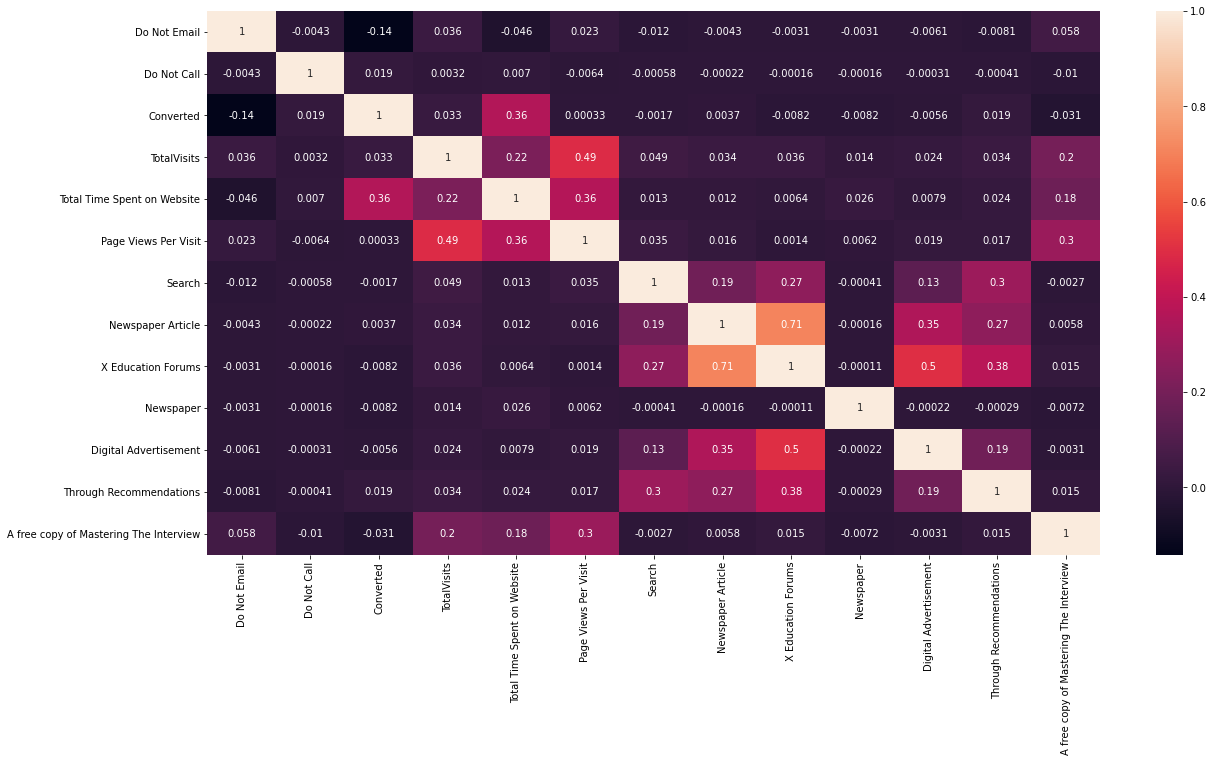

In [892]:
# Making a heatmap t determine the correlations between the variables
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

### Data preperation

#### getting dummies

In [893]:
# Getting dummies for the rest of categorical columns.
dummy1 = pd.get_dummies(df[cat_col], drop_first=True)

# Adding the results to the master dataframe
df1 = pd.concat([df, dummy1], axis=1)

In [894]:
df1=df1.drop(cat_col,axis=1)

In [895]:
df1.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [896]:
df1=df1.drop(['What matters most to you in choosing a course_Not specified','Specialization_Not specified','What is your current occupation_Not specified','Country_Not specified'], axis=1)

### Test_train_split

In [897]:
# Putting feature variable to X
X = df1.drop(['Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [898]:
# Putting response variable to y
y = df1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [899]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [900]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel
3009,0,0,-0.284595,-0.160255,-0.155018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.155018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.671384,-0.888650,-1.265540,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4750,0,0,-0.284595,1.643304,-0.155018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7987,0,0,0.295588,2.017593,0.122613,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [901]:
# Checking the Converted Rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

### Model Building

In [902]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6284
Model Family:                Binomial   Df Model:                           66
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 07 Mar 2021   Deviance:                          nan
Time:                        20:44:02   Pearson chi2:                 7.71e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    6.582e+15   6.83e+07   9.64e+07      0.000    6.58e+15    6.58e+15
Do Not Email                                                             6.527e+12   4.43e+06   1.47e+06      0.000    6.53e+12    6.53e+12
Do Not Call                                                              2.806e+15   4.76e+07    5.9e+07      0.000    2.81e+15    2.81e+15
TotalVisits                                                              9.359e+13   9.75e+05    9.6e+07      0.000    9.36e+13    9.36e+13
Total Time Spent on Website                                              7.983e+14   9.79e+05   8.15e+08      0.000    7.98e+14    7.98e+14
Page Views Per Visit                                                    -1.206e+14   1.37e+06   -8.8e+07      0.000   -1.21e+14   -1.21e+14
Search                                                                   7.642e+14   2.38e+07   3.21e+07      0.000    7.64e+14    7.64e+14
Newspaper Article                                                        4.741e+15   6.73e+07   7.05e+07      0.000    4.74e+15    4.74e+15
X Education Forums                                                      -8.686e+15   1.12e+08  -7.73e+07      0.000   -8.69e+15   -8.69e+15
Newspaper                                                               -6.562e+15   6.72e+07  -9.76e+07      0.000   -6.56e+15   -6.56e+15
Digital Advertisement                                                    1.464e+15   4.75e+07   3.08e+07      0.000    1.46e+15    1.46e+15
Through Recommendations                                                 -1.074e+15   3.57e+07  -3.01e+07      0.000   -1.07e+15   -1.07e+15
A free copy of Mastering The Interview                                  -1.606e+14   2.66e+06  -6.03e+07      0.000   -1.61e+14   -1.61e+14
Lead Origin_Landing Page Submission                                     -6.492e+13   3.15e+06  -2.06e+07      0.000   -6.49e+13   -6.49e+13
Lead Origin_Lead Add Form                                               -3.427e+15   4.76e+07   -7.2e+07      0.000   -3.43e+15   -3.43e+15
Lead Origin_Lead Import                                                  3.304e+15   6.91e+07   4.78e+07      0.000     3.3e+15     3.3e+15
What matters most to you in choosing a course_Flexibility & Convenience    41.9937   3.76e-07   1.12e+08      0.000      41.994      41.994
What matters most to you in choosing a course_Other                     -5.359e+15   6.73e+07  -7.97e+07      0.000   -5.36e+15   -5.36e+15
Specialization_Business Administration                                   4.179e+13   4.92e+06   8.49e+06      0.000    4.18e+13    4.18e+13
Spe

### Feature Selection Using RFE

In [903]:
logreg = LogisticRegression()

In [904]:
rfe = RFE(logreg,20)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [905]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True, False,  True, False,  True, False, False, False,
        True, False, False, False,  True, False, False,  True, False,
       False,  True, False, False, False])

In [906]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 9),
 ('TotalVisits', False, 30),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('Search', False, 46),
 ('Newspaper Article', False, 19),
 ('X Education Forums', False, 29),
 ('Newspaper', False, 3),
 ('Digital Advertisement', False, 35),
 ('Through Recommendations', False, 39),
 ('A free copy of Mastering The Interview', False, 37),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 28),
 ('What matters most to you in choosing a course_Flexibility & Convenience',
  False,
  48),
 ('What matters most to you in choosing a course_Other', False, 43),
 ('Specialization_Business Administration', False, 18),
 ('Specialization_E-Business', False, 13),
 ('Specialization_E-COMMERCE', False, 15),
 ('Specialization_International Business', False, 20),
 ('Specialization_Management', False, 16),
 ('Specialization_Media and Advertising'

In [907]:
col = X_train.columns[rfe.support_]

In [908]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Other',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Receiv

#### Assessing the model with StatsModels

In [909]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2566.6
Date:                Sun, 07 Mar 2021   Deviance:                       5133.1
Time:                        20:44:15   Pearson chi2:                 6.20e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9490      0.110     -8.602      0.000      -1.165      -0.733
Do Not Email                                            -1.7806      0.185     -9.640      0.000      -2.143      -1.419
Total Time Spent on Website                              1.1364      0.041     27.697      0.000       1.056       1.217
Lead Origin_Lead Add Form                                2.2045      0.228      9.654      0.000       1.757       2.652
Last Activity_Converted to Lead                         -1.2580      0.225     -5.603      0.000      -1.698      -0.818
Last Activity_Had a Phone Conversation                   2.6368      0.745      3.541      0.000       1.177       4.096
Last Activity_Olark Chat Conversation                   -1.3764      0.164     -8.376      0.000      -1.698      -1.054
Last Activity_Resubscribed to emails                    24.5249   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   1.2489      0.076     16.404      0.000       1.100       1.398
Last Activity_Unsubscribed                               1.3928      0.466      2.986      0.003       0.479       2.307
What is your current occupation_Housewife               24.0106   1.56e+04      0.002      0.999   -3.06e+04    3.07e+04
What is your current occupation_Other                    2.0391      0.722      2.823      0.005       0.623       3.455
What is your current occupation_Student                  1.4148      0.232      6.109      0.000       0.961       1.869
What is your current occupation_Unemployed               1.2742      0.088     14.411      0.000       1.101       1.448
What is your current occupation_Working Professional     3.7750      0.200     18.867      0.000       3.383       4.167
Lead Source_Direct Traffic                              -1.6162      0.119    -13.550      0.000      -1.850      -1.382
Lead Source_Google                                      -1.2196      0.113    -10.797      0.000      -1.441      -0.998
Lead Source_Organic Search                              -1.4605      0.137    -10.663      0.000      -1.729      -1.192
Lead Source_Referral Sites                              -1.5964      0.360     -4.435      0.000      -2.302      -0.891
Lead Source_Welingak Website                             1.9998      0.753      2.657      0.008       0.525       3.475
Lead Source_google                                     -22.0358   2.21e+04     -0.001      0.999   -4.33e+04    4.33e+04
========================================================================================================================
"""

In [910]:
col=col.drop(['What is your current occupation_Housewife','Last Activity_Resubscribed to emails','Lead Source_google'])

In [911]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2579.1
Date:                Sun, 07 Mar 2021   Deviance:                       5158.2
Time:                        20:44:15   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9340      0.109     -8.552      0.000      -1.148      -0.720
Do Not Email                                            -1.7891      0.184     -9.697      0.000      -2.151      -1.427
Total Time Spent on Website                              1.1321      0.041     27.713      0.000       1.052       1.212
Lead Origin_Lead Add Form                                2.2702      0.228      9.937      0.000       1.822       2.718
Last Activity_Converted to Lead                         -1.2650      0.224     -5.642      0.000      -1.704      -0.826
Last Activity_Had a Phone Conversation                   2.6274      0.744      3.529      0.000       1.168       4.086
Last Activity_Olark Chat Conversation                   -1.3801      0.164     -8.410      0.000      -1.702      -1.058
Last Activity_SMS Sent                                   1.2389      0.076     16.311      0.000       1.090       1.388
Last Activity_Unsubscribed                               1.3937      0.466      2.991      0.003       0.480       2.307
What is your current occupation_Other                    2.0117      0.722      2.788      0.005       0.597       3.426
What is your current occupation_Student                  1.3880      0.231      6.000      0.000       0.935       1.841
What is your current occupation_Unemployed               1.2490      0.088     14.271      0.000       1.077       1.421
What is your current occupation_Working Professional     3.7472      0.200     18.771      0.000       3.356       4.138
Lead Source_Direct Traffic                              -1.5998      0.119    -13.475      0.000      -1.833      -1.367
Lead Source_Google                                      -1.2072      0.112    -10.736      0.000      -1.428      -0.987
Lead Source_Organic Search                              -1.4337      0.136    -10.521      0.000      -1.701      -1.167
Lead Source_Referral Sites                              -1.5877      0.359     -4.421      0.000      -2.292      -0.884
Lead Source_Welingak Website                             1.9467      0.753      2.586      0.010       0.471       3.422
========================================================================================================================
"""

In [912]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred

3009    0.062081
1012    0.233771
9226    0.633632
4750    0.637725
7987    0.903633
          ...   
367     0.136192
82      0.859014
8199    0.943643
7077    0.308774
5754    0.539961
Length: 6351, dtype: float64

In [913]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06208051, 0.2337707 , 0.63363235, 0.63772532, 0.90363294,
       0.79971942, 0.04152806, 0.92428678, 0.86030336, 0.88670762])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [914]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID
0,0,0.062081,3009
1,0,0.233771,1012
2,0,0.633632,9226
3,1,0.637725,4750
4,1,0.903633,7987


In [915]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.062081,3009,0
1,0,0.233771,1012,0
2,0,0.633632,9226,1
3,1,0.637725,4750,1
4,1,0.903633,7987,1


In [916]:
from sklearn import metrics

In [917]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3460  445]
 [ 735 1711]]


In [918]:
# Predicted     not_converted    converted
# Actual
# not_Converted        3459        446
# converted            712        1734  

In [919]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8142024877971973


### Checking VIFs

In [920]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [921]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.74
12,Lead Source_Direct Traffic,1.86
13,Lead Source_Google,1.85
2,Lead Origin_Lead Add Form,1.74
6,Last Activity_SMS Sent,1.57
14,Lead Source_Organic Search,1.40
11,What is your current occupation_Working Profes...,1.35
16,Lead Source_Welingak Website,1.33
0,Do Not Email,1.20
1,Total Time Spent on Website,1.19


In [922]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2579.1
Date:                Sun, 07 Mar 2021   Deviance:                       5158.2
Time:                        20:44:17   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9340      0.109     -8.552      0.000      -1.148      -0.720
Do Not Email                                            -1.7891      0.184     -9.697      0.000      -2.151      -1.427
Total Time Spent on Website                              1.1321      0.041     27.713      0.000       1.052       1.212
Lead Origin_Lead Add Form                                2.2702      0.228      9.937      0.000       1.822       2.718
Last Activity_Converted to Lead                         -1.2650      0.224     -5.642      0.000      -1.704      -0.826
Last Activity_Had a Phone Conversation                   2.6274      0.744      3.529      0.000       1.168       4.086
Last Activity_Olark Chat Conversation                   -1.3801      0.164     -8.410      0.000      -1.702      -1.058
Last Activity_SMS Sent                                   1.2389      0.076     16.311      0.000       1.090       1.388
Last Activity_Unsubscribed                               1.3937      0.466      2.991      0.003       0.480       2.307
What is your current occupation_Other                    2.0117      0.722      2.788      0.005       0.597       3.426
What is your current occupation_Student                  1.3880      0.231      6.000      0.000       0.935       1.841
What is your current occupation_Unemployed               1.2490      0.088     14.271      0.000       1.077       1.421
What is your current occupation_Working Professional     3.7472      0.200     18.771      0.000       3.356       4.138
Lead Source_Direct Traffic                              -1.5998      0.119    -13.475      0.000      -1.833      -1.367
Lead Source_Google                                      -1.2072      0.112    -10.736      0.000      -1.428      -0.987
Lead Source_Organic Search                              -1.4337      0.136    -10.521      0.000      -1.701      -1.167
Lead Source_Referral Sites                              -1.5877      0.359     -4.421      0.000      -2.292      -0.884
Lead Source_Welingak Website                             1.9467      0.753      2.586      0.010       0.471       3.422
========================================================================================================================
"""

In [923]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3460,  445],
       [ 735, 1711]], dtype=int64)

In [924]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8142024877971973

## Metrics beyond simply accuracy

In [925]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [926]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6995094031071136

In [927]:
# Let us calculate specificity
TN / float(TN+FP)

0.8860435339308579

In [928]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11395646606914213


In [929]:
# positive predictive value 
print (TP / float(TP+FP))

0.7935992578849722


In [930]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8247914183551848


### Plotting the ROC Curve

An ROC curve demonstrates several things:

   - It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
   - The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
   - The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [931]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [932]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

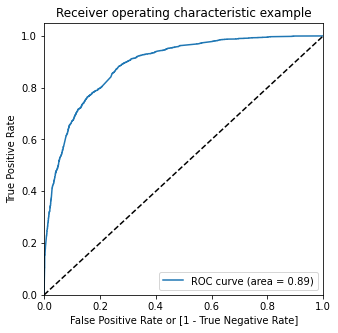

In [933]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [934]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.062081,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.233771,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.633632,9226,1,1,1,1,1,1,1,1,0,0,0
3,1,0.637725,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.903633,7987,1,1,1,1,1,1,1,1,1,1,1


In [935]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.610298  0.983238  0.376697
0.2   0.2  0.764447  0.921096  0.666325
0.3   0.3  0.790584  0.872036  0.739565
0.4   0.4  0.811841  0.769419  0.838412
0.5   0.5  0.814202  0.699509  0.886044
0.6   0.6  0.807589  0.638185  0.913700
0.7   0.7  0.781452  0.517989  0.946479
0.8   0.8  0.760353  0.432134  0.965941
0.9   0.9  0.713274  0.277187  0.986428


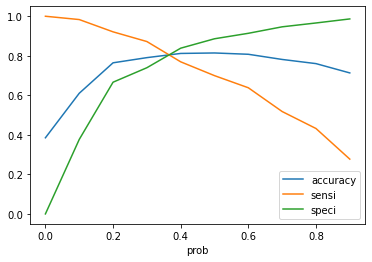

In [936]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.4 is the optimum point to take it as a cutoff probability

In [937]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.062081,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.233771,1012,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.633632,9226,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.637725,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.903633,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [938]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8064871673752165

In [939]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3201,  704],
       [ 525, 1921]], dtype=int64)

In [940]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [941]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7853638593622241

In [942]:
# Let us calculate specificity
TN / float(TN+FP)

0.819718309859155

In [943]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18028169014084508


In [944]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7318095238095238


In [945]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8590982286634461


### Precision and Recall

In [946]:
#Looking at the confusion matrix again
from sklearn.metrics import precision_score, recall_score

In [947]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7935992578849722

In [948]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6995094031071136

#### Precision and recall tradeoff

In [949]:
from sklearn.metrics import precision_recall_curve

In [950]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: predicted, Length: 6351, dtype: int64)

In [951]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

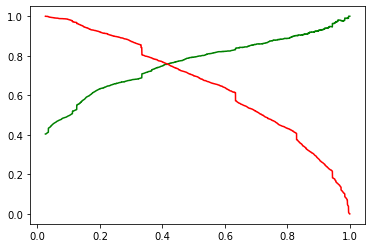

In [952]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [953]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.062081,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.233771,1012,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.633632,9226,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.637725,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.903633,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [954]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3201,  704],
       [ 525, 1921]], dtype=int64)

In [955]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8064871673752165

In [956]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7935992578849722

In [957]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6995094031071136

### Making predictions on the test set

In [958]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel
3271,0,0,0.143722,-0.591008,0.998931,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,0,0,0.391416,1.894051,1.564920,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,0,0,-0.351665,-0.743117,-0.133048,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4216,0,0,-0.847051,-0.878732,-1.265027,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3830,0,0,1.134496,-0.578179,2.130909,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [959]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website
3271,0,-0.591008,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.894051,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
7936,0,-0.743117,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.878732,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3830,0,-0.578179,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [960]:
X_test_sm = sm.add_constant(X_test)

##### Making predictions on the test set

In [961]:
y_test_pred = res.predict(X_test_sm)

In [962]:
y_test_pred[:10]

3271    0.056770
1490    0.966356
7936    0.048222
4216    0.849336
3830    0.046431
1800    0.683260
6507    0.405998
4821    0.296374
4223    0.944238
4714    0.334045
dtype: float64

In [963]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [964]:
# Let's see the head
y_pred_1.head()

,0
3271,0.056770
1490,0.966356
7936,0.048222
4216,0.849336
3830,0.046431


In [965]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [966]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [967]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [968]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [969]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.056770
1,1,1490,0.966356
2,0,7936,0.048222
3,1,4216,0.849336
4,0,3830,0.046431


In [970]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [971]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_prob'], axis=1)

In [972]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.056770
1,1490,1,0.966356
2,7936,0,0.048222
3,4216,1,0.849336
4,3830,0,0.046431


In [980]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.37 else 0)

In [981]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.056770,0
1,1490,1,0.966356,1
2,7936,0,0.048222,0
3,4216,1,0.849336,1
4,3830,0,0.046431,0


In [982]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8094013955196474

In [983]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1431,  303],
       [ 216,  773]], dtype=int64)

In [977]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [984]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.756319514661274

In [985]:
# Let us calculate specificity
TN / float(TN+FP)

0.845444059976932

In [990]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7184014869888475

In [991]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.78159757330637